<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Pregunta de Investigación </H1>
<H5 align='center'> Si extraemos las activaciones que producen las capas de una CNN frente a un conjunto de imágenes, veremos que imágenes similares obtienen representaciones similares e imágenes diferentes obtienen representaciones diferentes. </H5>

<H3> INF-395 Redes Neuronales y Deep Learning </H3>
<H3> Autores: Francisco Andrades | Lucas Díaz</H3>

Lenguaje: Python

Temas:

    - Arquitecturas de Redes Convolucionales.
    - Entrenamiento de Redes Convolucionales.
    - Regularización.
    - Tasas adaptivas, Batchnormalization.
    - Problemas Especiales.

Video Explicativo: https://youtu.be/_biMZkAE_As

<hr style="height:2px;border:none"/>

## Pregunta de Investigación 

\
**Hipótesis:**  Si extraemos las activaciones que producen las capas de una CNN frente a un conjunto de imágenes, veremos que imágenes similares obtienen representaciones similares e imágenes diferentes obtienen representaciones diferentes.


**Objetivo:**  Demostrar la hipótesis.

**Propuesta:** Se demostrará la hipótesis utilizando una función de similitud objetiva y matemática, interpretando las activaciones de las capas convolucionales como imágenes.

**Metodología** 
1. Se harán experimentos en 2 datasets reales, utilizando arquitecturas convolucionales definida para cada dataset.
2. Se entrenarán los modelos sobre un conjunto de entrenamiento y se utilizará un conjunto de test para extraer las activaciones de cada capa convolucional presente en la red.
3. Se computará la función de similitud sobre cada par posible de imágenes en el conjunto de test y sobre cada par posible de imágenes en las activaciones de cada capa.
4. Se generarán estadísticas pertinentes que permitan comparar las similitudes.
5. Se presentarán los resultados y se concluirá al respecto.

**Esqueleto**
1. Definir similitud.
    - ¿Qué función de similitud utilizaremos?
    - Similitud como medida relativa o absoluta.
2. Estadísticas pertinentes.
    - Similitud como medida objetiva.
    - Similitud como medida relativa.
    - Estadísticas descriptivas.
3. Modelo convolucional de clasificación. 
    - Generación de las estadísticas.
    - Fenómeno interesante.
4. Explicación y consideración del fenómeno.
    - Fenómeno inherente a la arquitecturas de clasificación.
    - Propuesta para considerar el fenómeno dentro de los experimentos.
        - Autoencoders.
6. Experimento final sobre todas las arquitecturas.
    - Modelo convolucional de clasificación.
    - Autoencoders.
7. Conclusiones.

In [ ]:
#Librerias
import matplotlib.pyplot as plt 
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import cv2
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras import Model
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import tensorflow



In [ ]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist

# load train and test dataset
def load_dataset_mnist():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def load_dataset_fashion_mnist():
    shape = 28
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
def preds_wrapper(preds):
    return np.array([NormalizeData(elem) for elem in preds])
def testX_wrapper(images):
    #print("testxwrapper ", shape/2)
    return np.array([cv2.resize(elem, (14, 14)) for elem in images])

In [ ]:
def misma_clase(imgs):
    return np.array([
                     np.all(image1 == image2) 
                     for (cont,image1) in enumerate(imgs[100:199],start=1) 
                     for image2 in imgs[100+cont:200]
                     ])

In [ ]:
import scipy
def plotear(statistic, n_layer, axs, lmc, fila, ranking = False, fig=True):
    alpha = 0.5
    #axs = axs.reshape(1, -1)
    if ranking:
        ssim_originales, ssim_preds, estadistica, nueva_estadistica = statistic[n_layer]['ranking']
        nueva_estadistica = nueva_estadistica/len(nueva_estadistica)
        
        alpha = 0.3
        axs[fila,1].set_xlim([-2000,2000])
        axs[fila,1].set_ylim([0,500])

        axs[fila,2].set_xlim([0,0.5])
        axs[fila,2].set_ylim([0,5000])      

    else:
        ssim_originales, ssim_preds, estadistica, nueva_estadistica = statistic[n_layer]['magnitud']

        axs[fila,1].set_xlim([-0.6,0.6])
        axs[fila,1].set_ylim([0,400])

        axs[fila,2].set_xlim([0,0.5])
        axs[fila,2].set_ylim([0,5000])      
        
    #title
    fig.suptitle("Capa %d " % n_layer, va='bottom', fontweight='bold')

    #scatter
    axs[fila, 0].scatter(x=ssim_originales, y=ssim_preds, c=lmc, alpha=alpha) #misma_clase_f

    axs[fila, 0].text(0.01, 0.93, transform = axs[fila, 0].transAxes, s="R^2: %f" % r2_score(np.squeeze(ssim_originales), np.squeeze(ssim_preds)))

    #histograma
    sns.histplot(estadistica, ax=axs[fila, 1], kde=True)
    axs[fila, 1].text(0.01, 0.93, transform = axs[fila, 1].transAxes, s="kurtosis: %f" % scipy.stats.kurtosis(estadistica))
    axs[fila, 1].text(0.01, 0.87, transform = axs[fila, 1].transAxes, s="stdev: %f" % np.std(estadistica))
    axs[fila, 1].text(0.01, 0.81, transform = axs[fila, 1].transAxes, s="mean: %f" % np.mean(estadistica))

    #cumulative
    #sns.boxplot(nueva_estadistica, ax=axs[fila, 2])
    sns.histplot(nueva_estadistica, ax=axs[fila, 2], cumulative = True, kde=True)
    sns.rugplot(nueva_estadistica, ax=axs[fila, 2], color="r")
    axs[fila, 2].axvline(np.percentile(nueva_estadistica, 80), color='y')

    return None

def plotear_layer(stats_list, layer, lmc, ranking = False):
    fig, axs = plt.subplots(len(stats_list), 3, figsize=(16, 3*len(stats_list)))
    axs = axs.reshape(len(stats_list), -1)
    for cont, elem in enumerate(stats_list):
        plotear(elem, layer, axs, lmc, fila=cont, ranking=ranking, fig=fig)
    return None

In [ ]:
def descriptive2(statistic, n_layer):
    ssim_originales_ranking, ssim_preds_ranking, estadistica2, nueva_estadistica2 = statistic[n_layer]['ranking']
    ssim_originales, ssim_preds, estadistica, nueva_estadistica = statistic[n_layer]['magnitud']

    #magnitud
    rcuadrado = scipy.stats.pearsonr(np.squeeze(ssim_originales), np.squeeze(ssim_preds))[0]
    desv_est = np.mean(nueva_estadistica)
    xpercentil = np.percentile(nueva_estadistica, 80)

    #ranking
    r_rcuadrado = scipy.stats.pearsonr(np.squeeze(ssim_originales_ranking), np.squeeze(ssim_preds_ranking))[0]
    r_desv_est = np.mean(nueva_estadistica2)
    r_xpercentil = np.percentile(nueva_estadistica2, 80)

    return rcuadrado, desv_est, xpercentil, r_rcuadrado, r_desv_est, r_xpercentil

def analisis(stats_list):
    fig, axs = plt.subplots(2, 3, figsize=(16,8))
    
    
    lista_cnn = np.array([descriptive2(stats_list[0], n_layer) for n_layer in range(4)])
    lista_binnary = np.array([descriptive2(stats_list[1], n_layer) for n_layer in range(4)])
    lista_ssim = np.array([descriptive2(stats_list[2], n_layer) for n_layer in range(4)])
    

    #magnitud
    axs[0, 0].set_title('R cuadrado')
    axs[0, 1].set_title('Media')
    axs[0, 2].set_title('Percentil')

    axs[0, 0].plot(lista_cnn[:, 0], marker='o', label='cnn')
    axs[0, 0].plot(lista_binnary[:, 0], marker='o', label='bin_cross_entr')
    axs[0, 0].plot(lista_ssim[:, 0], marker='o', label='ssim')
    axs[0, 0].legend()

    axs[0, 1].plot(lista_cnn[:, 1], marker='o')
    axs[0, 1].plot(lista_binnary[:, 1], marker='o')
    axs[0, 1].plot(lista_ssim[:, 1], marker='o')

    axs[0, 2].plot(lista_cnn[:, 2], marker='o')
    axs[0, 2].plot(lista_binnary[:, 2], marker='o')
    axs[0, 2].plot(lista_ssim[:, 2], marker='o')

    #ranking
    #axs[1, 0].set_title('R cuadrado')
    #axs[1, 1].set_title('Desviación estándar')
    #axs[1, 2].set_title('Percentil')

    axs[1, 0].plot(lista_cnn[:, 3], marker='o')
    axs[1, 0].plot(lista_binnary[:, 3], marker='o')
    axs[1, 0].plot(lista_ssim[:, 3], marker='o')

    axs[1, 1].plot(lista_cnn[:, 4], marker='o')
    axs[1, 1].plot(lista_binnary[:, 4], marker='o')
    axs[1, 1].plot(lista_ssim[:, 4], marker='o')

    axs[1, 2].plot(lista_cnn[:, 5], marker='o')
    axs[1, 2].plot(lista_binnary[:, 5], marker='o')
    axs[1, 2].plot(lista_ssim[:, 5], marker='o')

    
    return 

# 1. Definir similitud
  - Concepto abstracto.
  - Tiende a entenderse como subjetiva.
  - ¿Absoluta o relativa?

### ¿Qué función de similitud utilizaremos? 
  - Aterrizar el concepto de similitud a una función matemática.
  - SSIM.
  - Como trabajo futuro, extensión a otras funciones de similitud.

In [ ]:
def calcular_ssim(imgs):
    return MinMaxScaler().fit_transform(np.array([
                                                  tensorflow.image.ssim(image1.reshape(14, 14, -1), image2.reshape(14, 14, -1), 1.0) 
                                                  for (cont,image1) in enumerate(imgs[100:199],start=1) 
                                                  for image2 in imgs[100+cont:200]
                                                  ]).reshape(-1,1)).reshape(-1)

### Similitud como medida relativa o absoluta 

  - Análisis sobre la magnitud de las similitudes.
  - Análisis sobre la posición relativa de cada par de imágenes respecto a la magnitud.
    - Ranking.

In [ ]:
def ssim_ranking(ssim, tol=0.01):
    index_ssim = ssim.argsort()
    ssim_nuevas = []
    for cont in range(len(ssim)):
        aux = np.where(np.abs(ssim-ssim[cont]) < tol)[0]
        ssim_nuevas.append(np.median(np.array([np.where(index_ssim == cont)[0] for cont in aux])))
    return np.array(ssim_nuevas)

# 2. Estadísticas pertinentes 

Para cada activación:
  - Para cada par de imágenes 
\begin{align*}
    \scriptsize\text{Estadística 1: }& ssim_{originales} - ssim_{activacion}
    \\
    \scriptsize\text{Estadística 2: }& |ssim_{originales} - ssim_{activacion}| 
    \\
    \scriptsize\text{Estadística 3: }& Ranking(ssim_{originales}) - Ranking(ssim_{activacion})
    \\
    \scriptsize\text{Estadística 4: }& |Ranking(ssim_{originales}) - Ranking(ssim_{activacion})|
\end{align*}



In [ ]:
def generate_statistic(modelo, *data):
    trainX, trainy ,testX, testy = data
    preds = testX_wrapper(preds_wrapper(modelo.predict(testX)))
    
    #cálculo ssim para dataset testX y predicciones
    ssim_originales = calcular_ssim(testX_wrapper(testX))
    ssim_preds = calcular_ssim(preds)

    #ranking para testX y predicciones
    ssim_originales_nuevas = ssim_ranking(ssim_originales)
    ssim_preds_nuevas = ssim_ranking(ssim_preds)

    #escalar datos 
    ssim_preds = MinMaxScaler().fit_transform(ssim_preds.reshape(-1,1))
    ssim_originales = MinMaxScaler().fit_transform(ssim_originales.reshape(-1,1))

    #diferencia entre similitud entre imágenes input e imágenes capa
    estadistica = ssim_originales - ssim_preds
    estadistica = estadistica.reshape(-1)
    nueva_estadistica = np.abs(estadistica)

    #(ranking) diferencia entre imágenes input e imágenes capa
    estadistica2 = ssim_originales_nuevas - ssim_preds_nuevas
    nueva_estadistica2 = np.abs(estadistica2)

    return {"magnitud": [ssim_originales, ssim_preds, estadistica, nueva_estadistica],
            "ranking":[ssim_originales_nuevas, ssim_preds_nuevas, estadistica2, nueva_estadistica2]}

### Estadísticas descriptivas 
Para Magnitud:
  - Coeficiente de determinación entre función identidad y puntos $(ssim_{original},ssim_{activacion})$
  - Media estadística 2
  - Percentil 80 estadística 2

Para Ranking:
  - Coeficiente de determinación entre función identidad y puntos $(Ranking(ssim_{original}),Ranking(ssim_{activacion}))$
  - Media estadística 4
  - Percentil 80 estadística 4
  

# 3. Modelo convolucional de clasificación 

In [ ]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    #model.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_initializer='he_uniform')) #4ta capa
    #model.add(MaxPooling2D((2, 2)))#4ta capa
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Generación de las estadísticas

In [ ]:
def experimento(modelo, epocas, inicio, *data):
    trainX, trainy ,testX, testy = data
    modelo.fit(trainX, trainy, epochs = epocas)

    #capa
    modelo2 = Model(inputs=modelo.input, outputs=modelo.layers[inicio].output)
    #capa
    modelo3 = Model(inputs=modelo.input, outputs=modelo.layers[inicio+1].output)
    #capa
    modelo4 = Model(inputs=modelo.input, outputs=modelo.layers[inicio+3].output)
    #capa
    modelo5 = Model(inputs=modelo.input, outputs=modelo.layers[inicio+4].output)

    return [generate_statistic(modelo2, *data), generate_statistic(modelo3, *data), generate_statistic(modelo4, *data), generate_statistic(modelo5, *data)]

#cargar data mnist
trainX, trainY ,testX, testY = load_dataset_mnist()
trainX , testX = prep_pixels(trainX, testX)
lista_misma_clase = misma_clase(testY)

#cargar data fashion_mnist
trainX_f, trainY_f, testX_f, testY_f = load_dataset_fashion_mnist()
trainX_f, testX_f = prep_pixels(trainX_f, testX_f)
lista_misma_clase_f = misma_clase(testY_f)

#exp mnist
statistic_cnn_mnist = experimento(define_model(), 10, 0, trainX, trainY, testX, testY)

#exp fashion_mnist
statistic_cnn_fashion = experimento(define_model(), 10, 0, trainX_f, trainY_f, testX_f, testY_f)

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 49s 3ms/step - loss: 0.2765 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0388 - accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9929
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 10/10
1875/1

### Fenómeno interesante

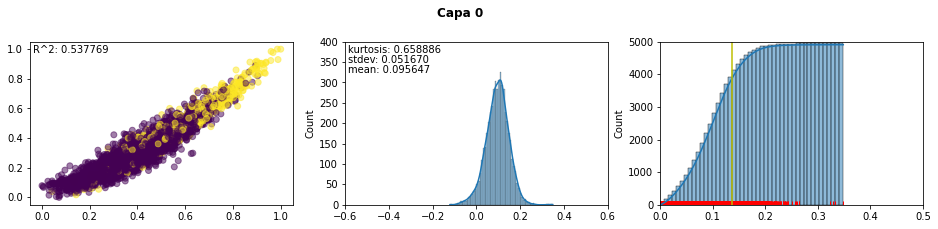

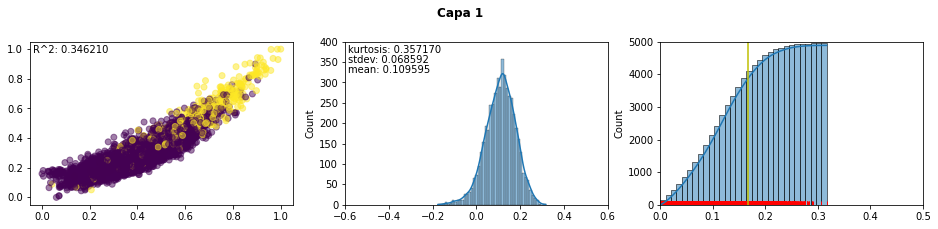

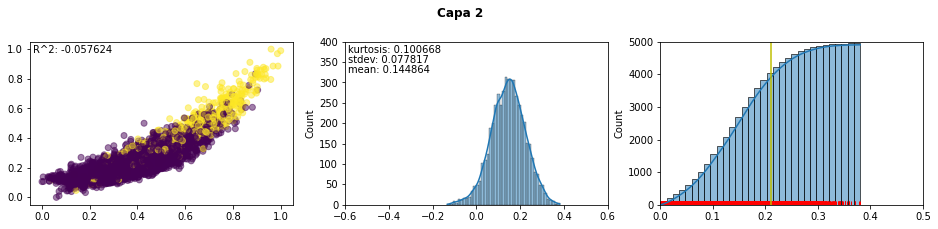

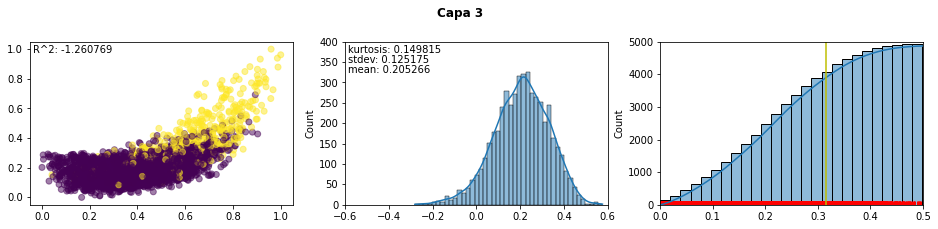

In [ ]:
#magnitud
plotear_layer([statistic_cnn_mnist], 0, lista_misma_clase, ranking = False)
plotear_layer([statistic_cnn_mnist], 1, lista_misma_clase, ranking = False)
plotear_layer([statistic_cnn_mnist], 2, lista_misma_clase, ranking = False)
plotear_layer([statistic_cnn_mnist], 3, lista_misma_clase, ranking = False)

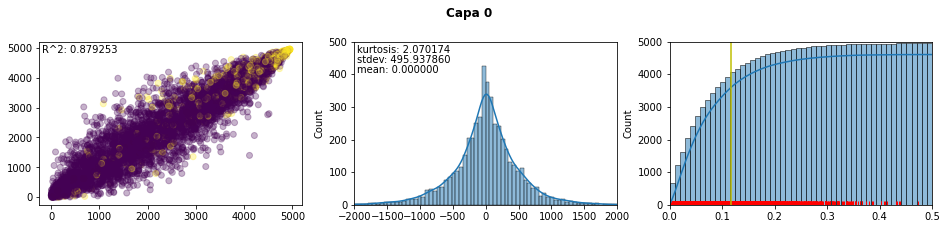

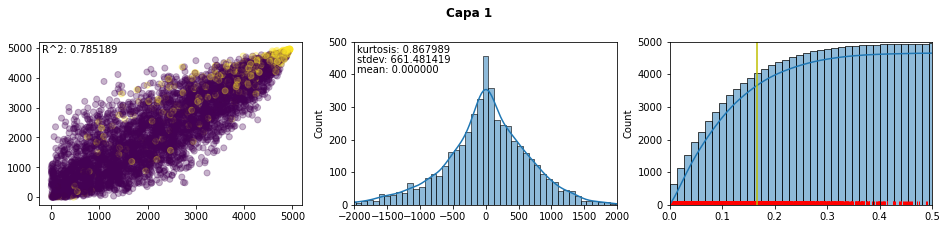

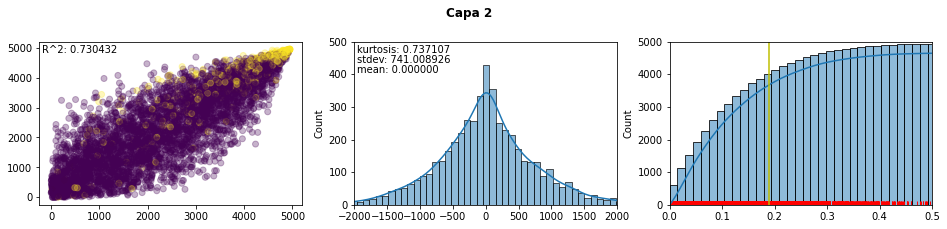

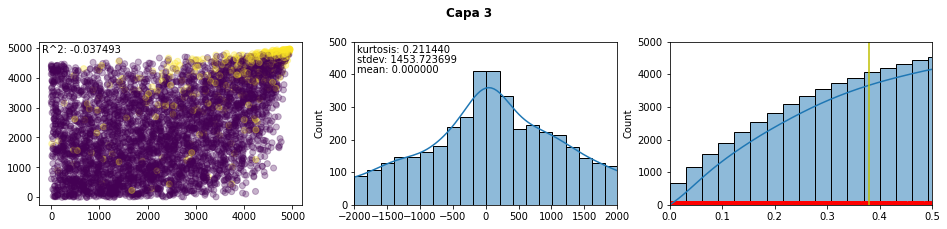

In [ ]:
#ranking
plotear_layer([statistic_cnn_mnist], 0, lista_misma_clase, ranking = True)
plotear_layer([statistic_cnn_mnist], 1, lista_misma_clase, ranking = True)
plotear_layer([statistic_cnn_mnist], 2, lista_misma_clase, ranking = True)
plotear_layer([statistic_cnn_mnist], 3, lista_misma_clase, ranking = True)

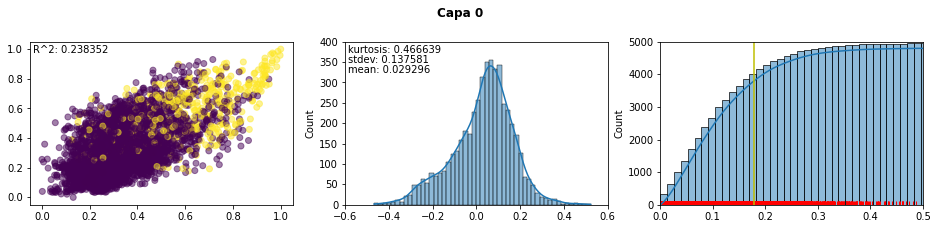

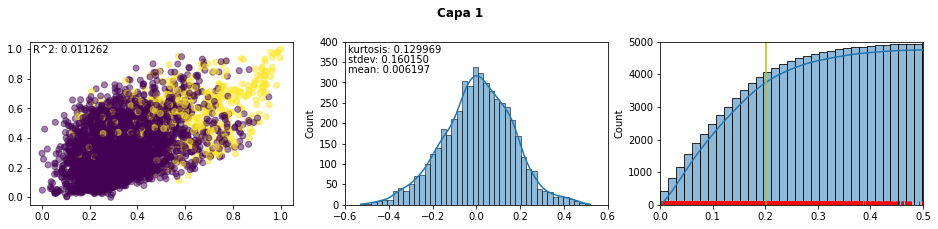

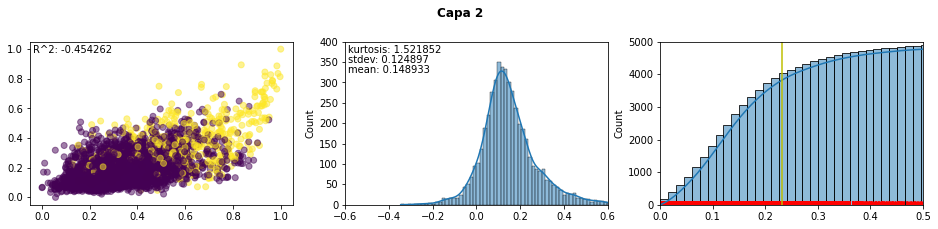

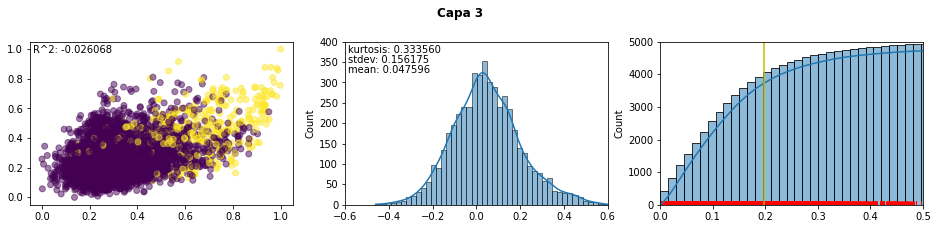

In [ ]:
#magnitud
plotear_layer([statistic_cnn_fashion], 0, lista_misma_clase_f, ranking = False)
plotear_layer([statistic_cnn_fashion], 1, lista_misma_clase_f, ranking = False)
plotear_layer([statistic_cnn_fashion], 2, lista_misma_clase_f, ranking = False)
plotear_layer([statistic_cnn_fashion], 3, lista_misma_clase_f, ranking = False)

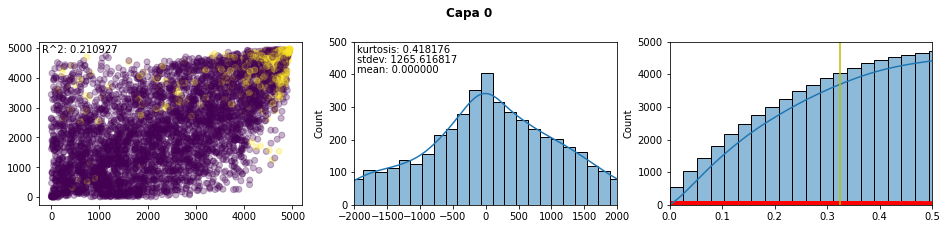

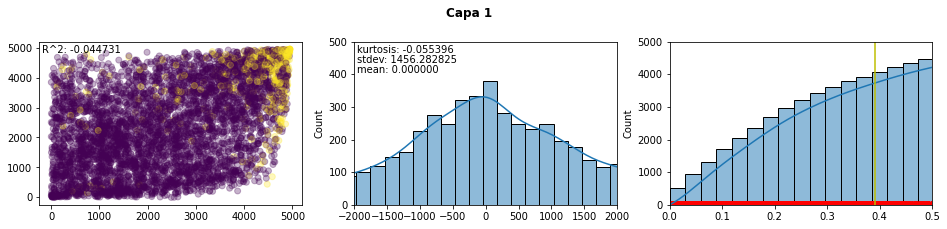

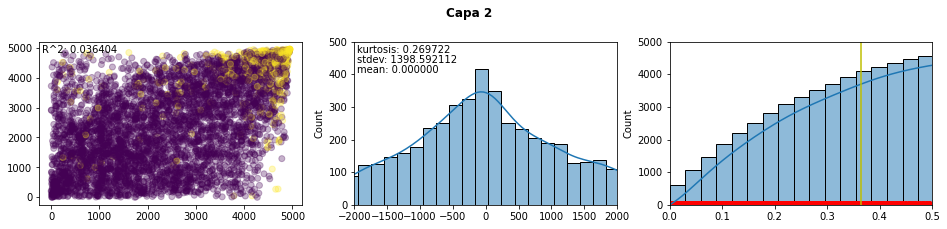

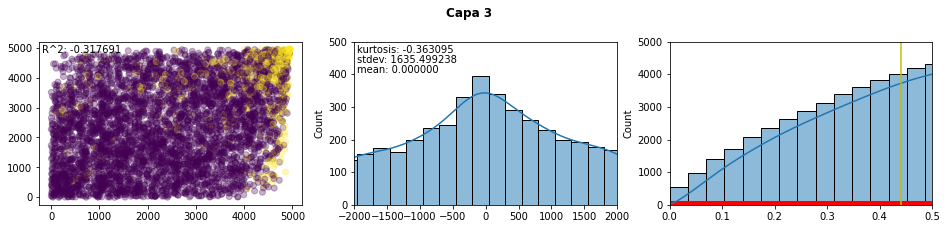

In [ ]:
#ranking
plotear_layer([statistic_cnn_fashion], 0, lista_misma_clase_f, ranking = True)
plotear_layer([statistic_cnn_fashion], 1, lista_misma_clase_f, ranking = True)
plotear_layer([statistic_cnn_fashion], 2, lista_misma_clase_f, ranking = True)
plotear_layer([statistic_cnn_fashion], 3, lista_misma_clase_f, ranking = True)

### Fenómeno: Existe un empeoramiento condicionado a la profundidad de la capa

# 4. Explicación y consideración del fenómeno 

### Fenómeno inherente a las arquitecturas de clasificación
- Criterio de Clasificación no es necesariamente coherente con función de similitud.
- Capas más profundas se especializan en el criterio y no se centran en almacenar la información que es relevante para la función de similitud.

### Propuesta para considerar el fenómeno dentro de los experimentos 

Autoencoders:
  - Loss Binary Cross entropy
  - Loss SSIM

In [ ]:
def SSIMLoss(y_true, y_pred):
    return 1 - tensorflow.reduce_mean(tensorflow.image.ssim(y_true, y_pred, 1.0))

def define_autoencoder(losse):
    input_img = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    #x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    #x = layers.MaxPooling2D((2, 2), padding='same')(x)#por 4ta capa conv
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)#4ta capa
    #x = layers.MaxPooling2D((2, 2), padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    #x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)#por 4ta capa
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)#por 4ta capa
    #x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss=losse)
    return autoencoder

# 5. Experimento final sobre todas las arquitecturas 

In [ ]:
print("Encoder_crossentropy")
statistic_encoder_binnary = experimento(define_autoencoder('binary_crossentropy'), 10, 1, trainX, trainX, testX, testY)

print("Encoder_sim")
statistic_encoder_ssim = experimento(define_autoencoder(SSIMLoss), 10, 1, trainX, trainX, testX, testY)

Encoder_crossentropy
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1061
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0651
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0635
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0625
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0620
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0616
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0613
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0610
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0608
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0606
Encoder_sim
Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0995
Epoch 2/10
1875/1875 [====================

In [ ]:
print("Encoder_crossentropy")
statistic_encoder_binnary_f = experimento(define_autoencoder('binary_crossentropy'), 10, 1, trainX_f, trainX_f, testX_f, testY_f)

print("Encoder_sim")
statistic_encoder_ssim_f = experimento(define_autoencoder(SSIMLoss), 10, 1, trainX_f, trainX_f, testX_f, testY_f)

Encoder_crossentropy
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2931
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2527
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2495
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2486
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2467
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2464
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2456
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2455
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2453
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2452
Encoder_sim
Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2496
Epoch 2/10
1875/1875 [====================

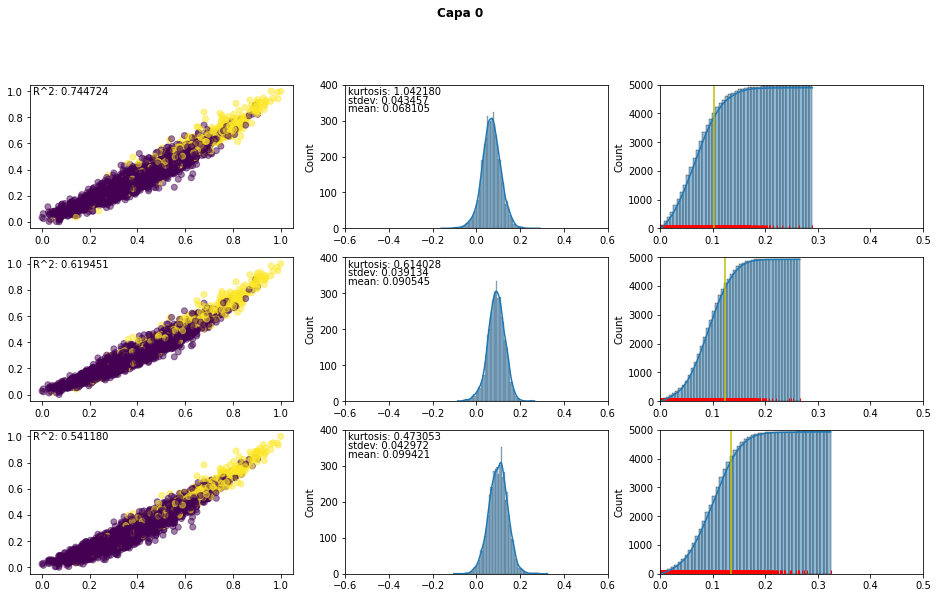

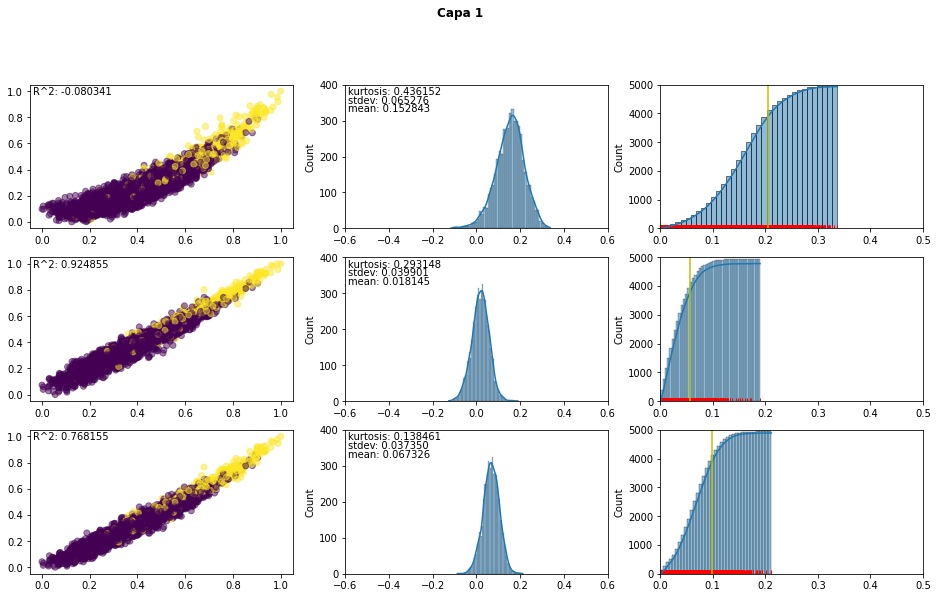

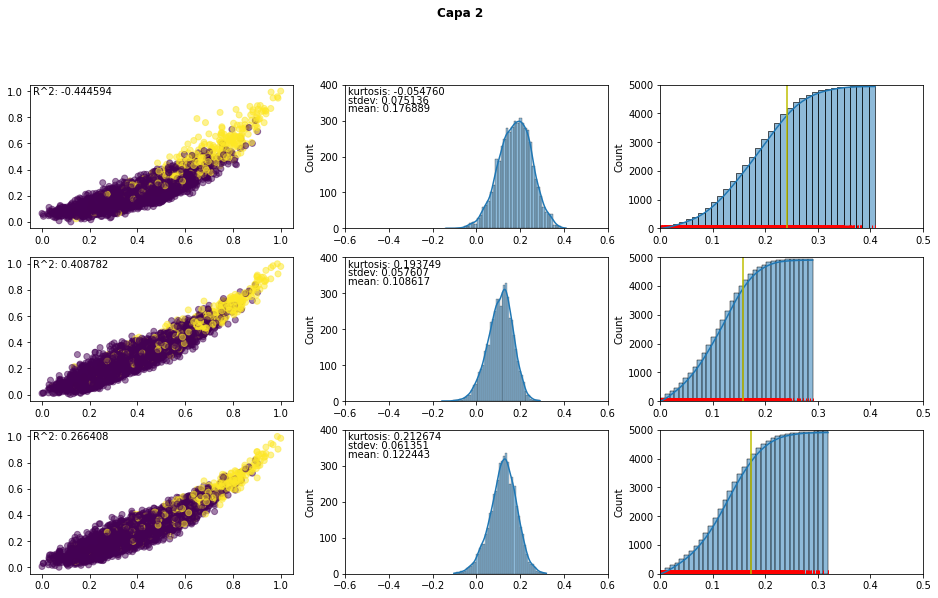

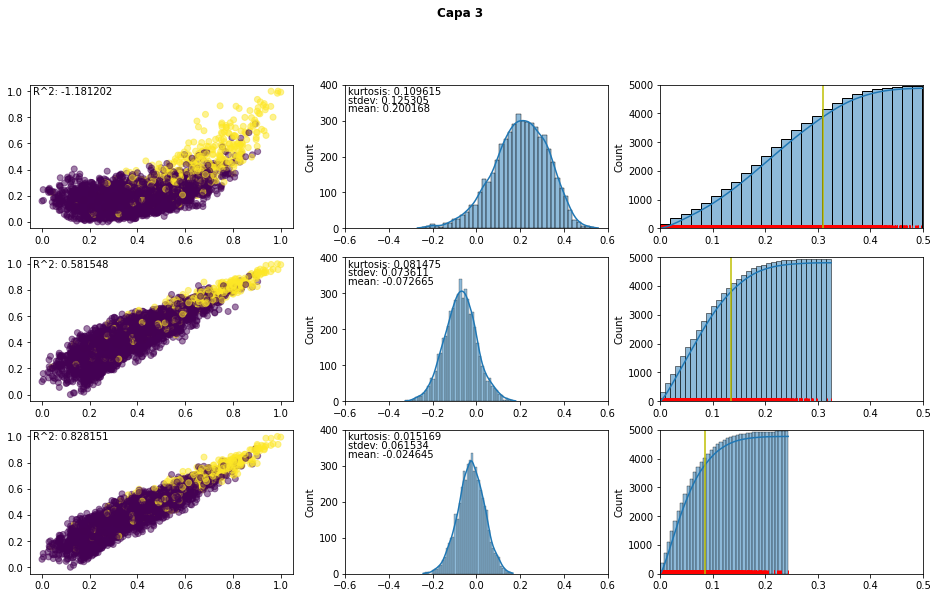

In [ ]:
#magnitud
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 0, lista_misma_clase, ranking = False)
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 1, lista_misma_clase, ranking = False)
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 2, lista_misma_clase, ranking = False)
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 3, lista_misma_clase, ranking = False)

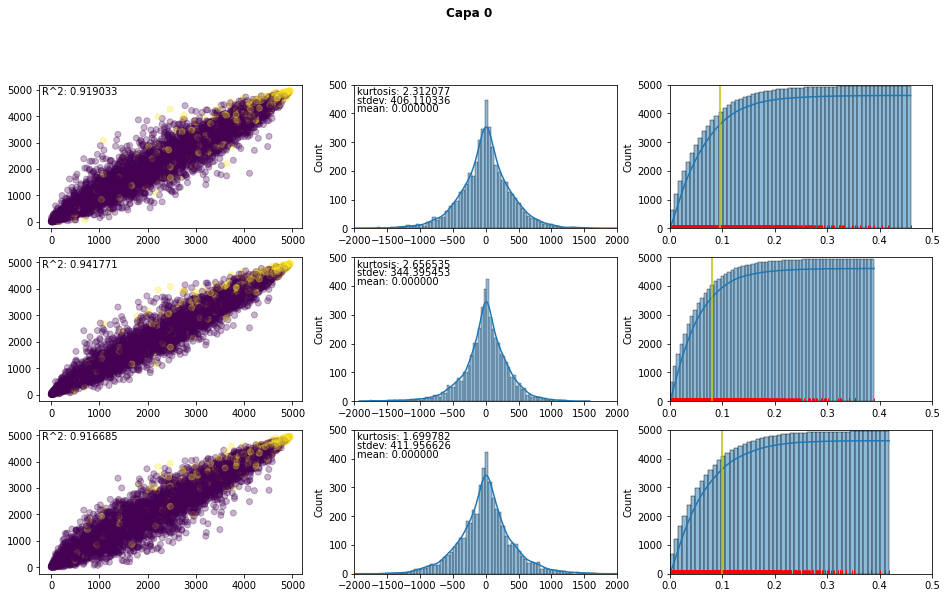

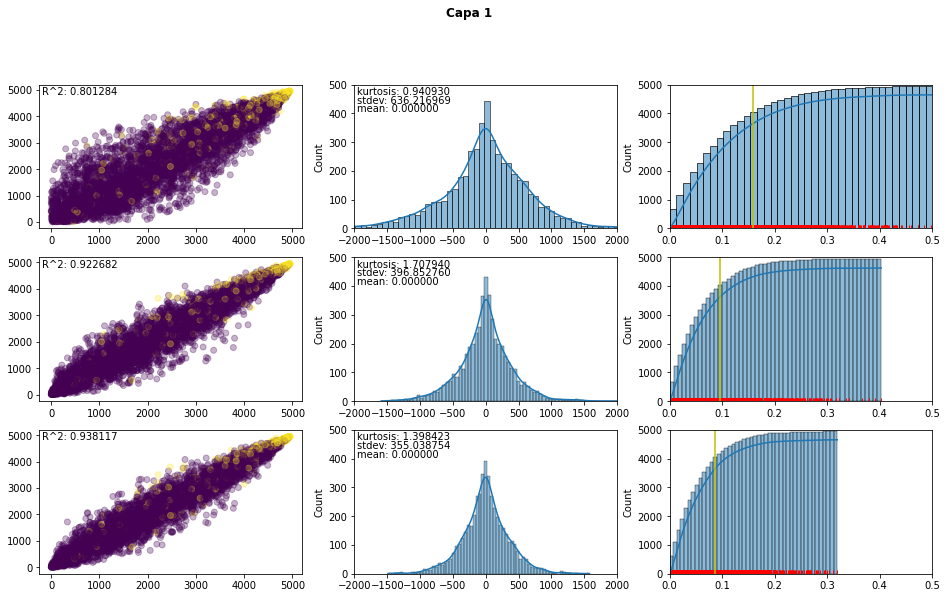

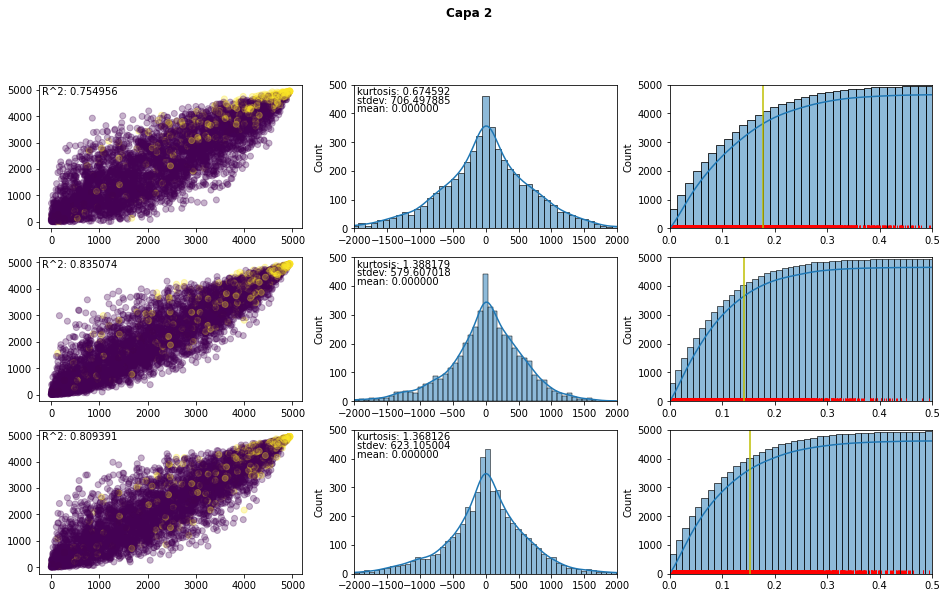

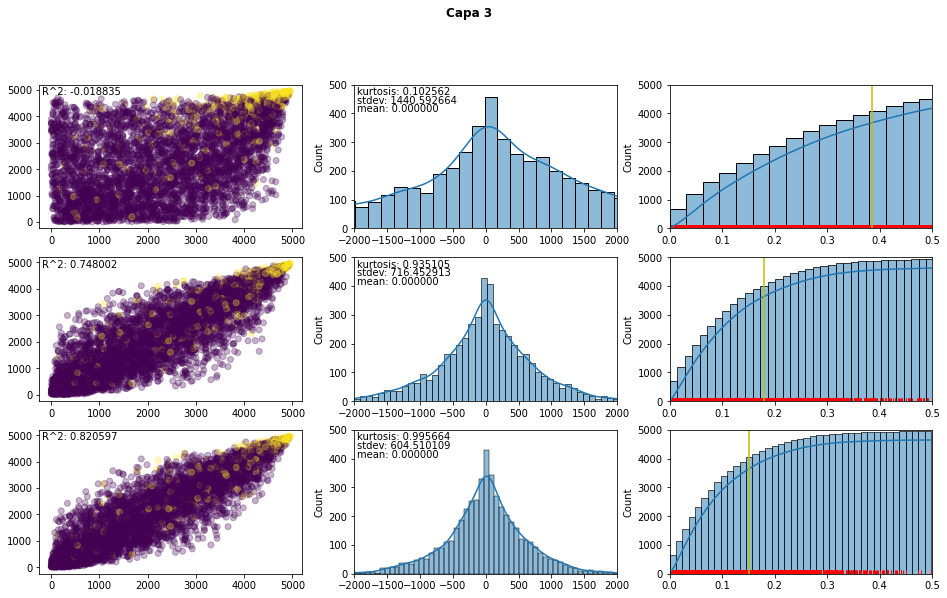

In [ ]:
#ranking
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 0, lista_misma_clase, ranking = True)
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 1, lista_misma_clase, ranking = True)
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 2, lista_misma_clase, ranking = True)
plotear_layer([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim], 3, lista_misma_clase, ranking = True)

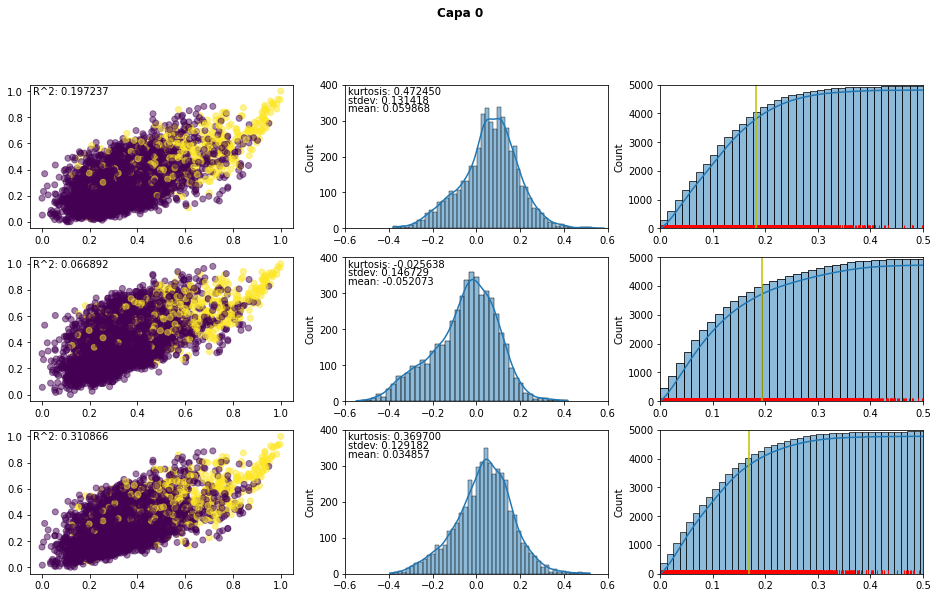

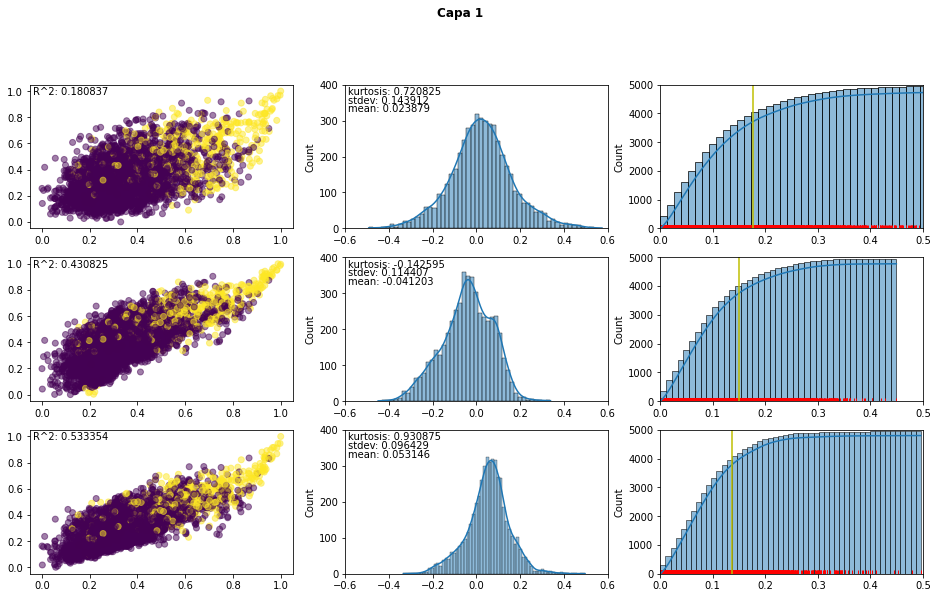

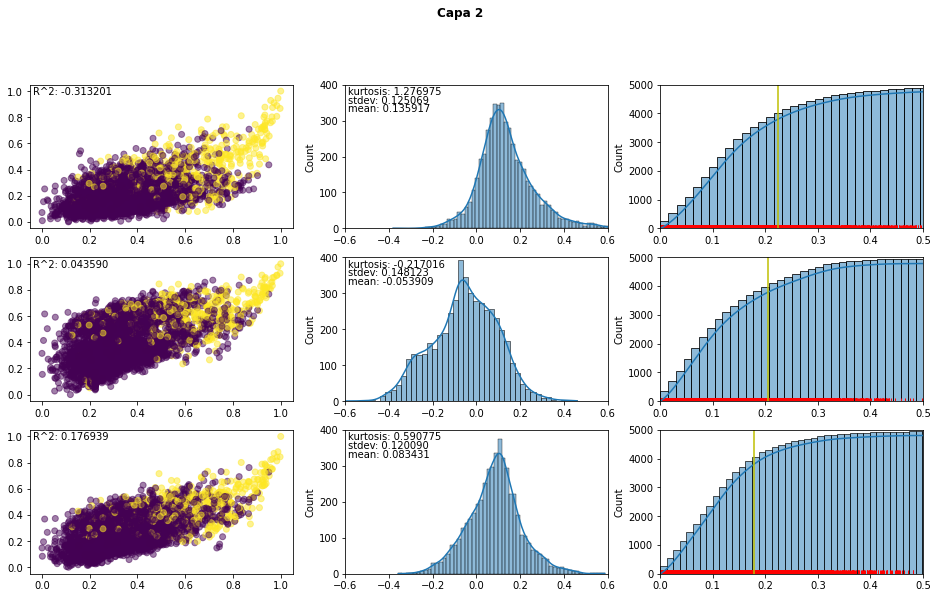

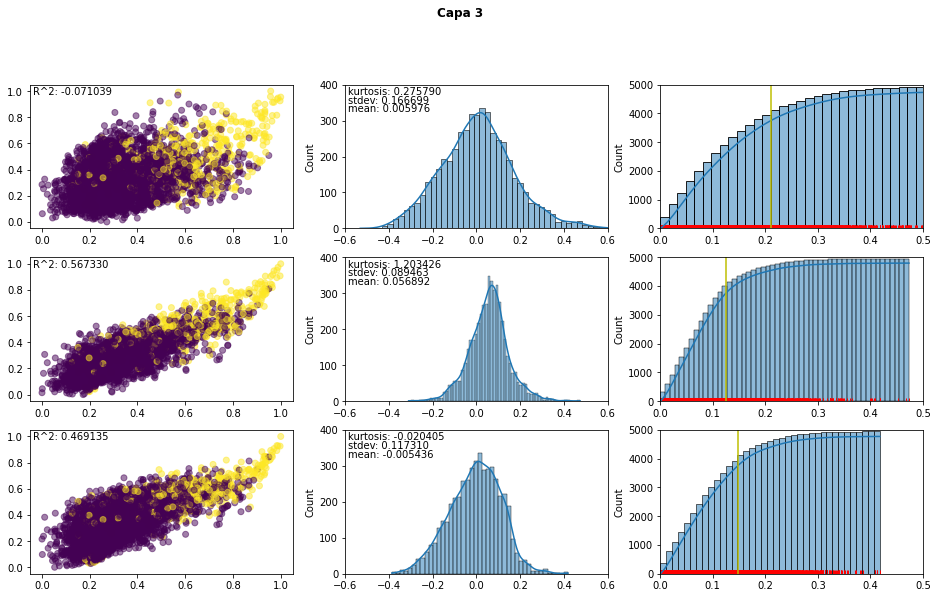

In [ ]:
#magnitud
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 0, lista_misma_clase_f, ranking = False)
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 1, lista_misma_clase_f, ranking = False)
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 2, lista_misma_clase_f, ranking = False)
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 3, lista_misma_clase_f, ranking = False)

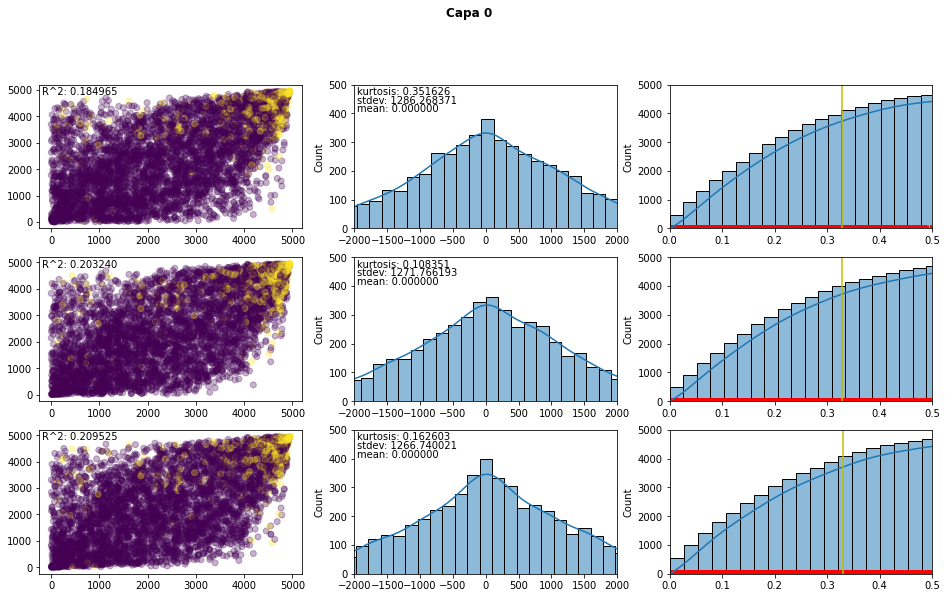

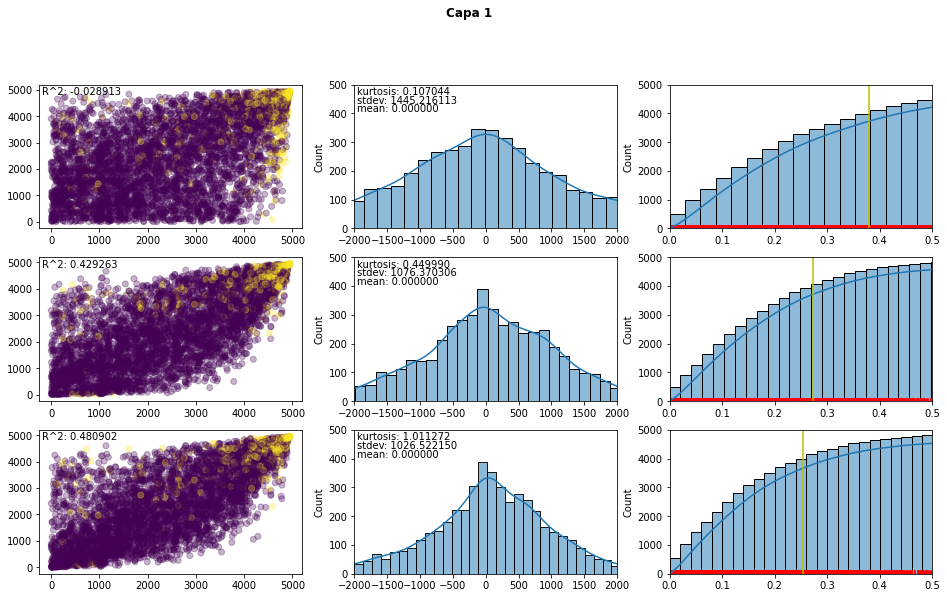

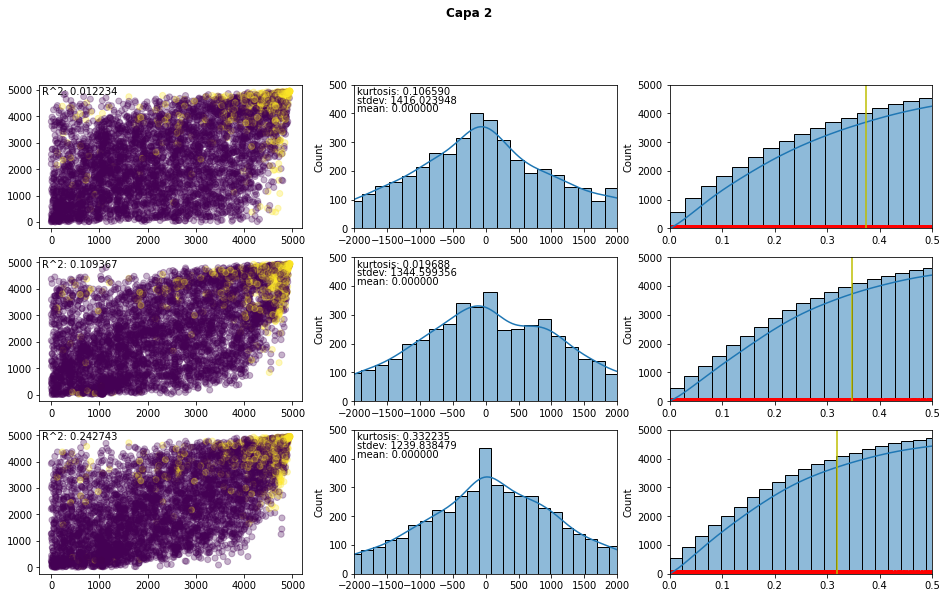

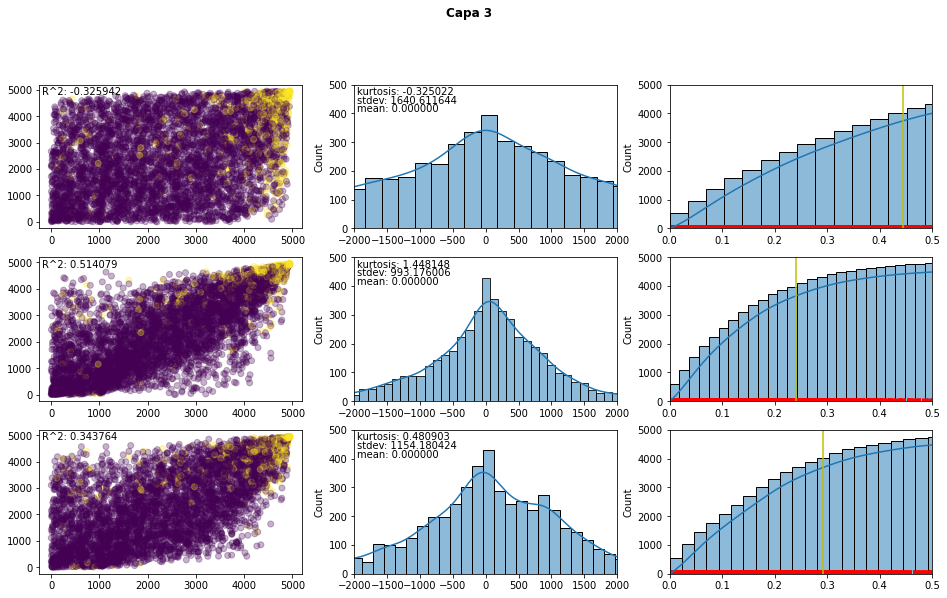

In [ ]:
#ranking
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 0, lista_misma_clase_f, ranking = True)
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 1, lista_misma_clase_f, ranking = True)
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 2, lista_misma_clase_f, ranking = True)
plotear_layer([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f], 3, lista_misma_clase_f, ranking = True)

# Estadística Descriptiva

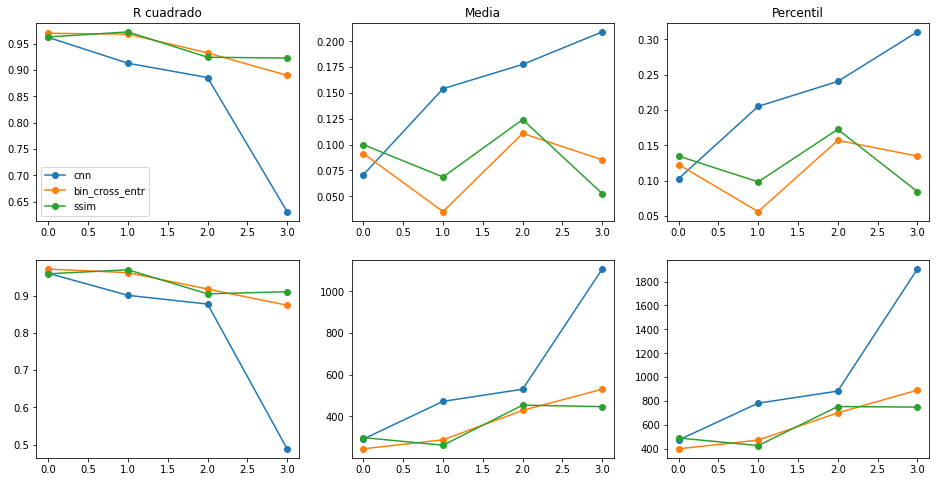

In [ ]:
analisis([statistic_cnn_mnist, statistic_encoder_binnary, statistic_encoder_ssim])

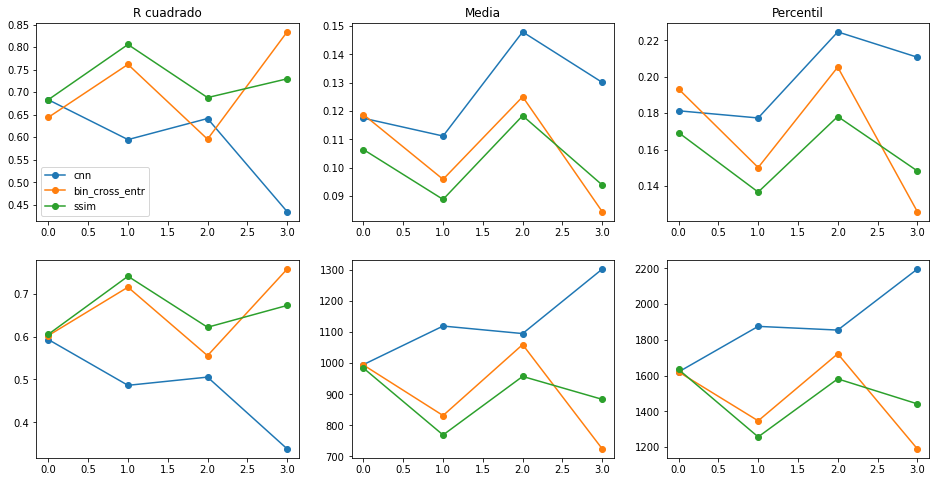

In [ ]:
analisis([statistic_cnn_fashion, statistic_encoder_binnary_f, statistic_encoder_ssim_f])

# Conclusiones

Volviendo a la pregunta de investigación: Si extraemos las activaciones que producen las capas de una CNN frente a un conjunto de imágenes, veremos que imágenes similares obtienen representaciones similares e imágenes diferentes obtienen representaciones diferentes.

¿Es verdadera? Depende.
  - Existe una clara tendencia a mantener las similitudes.
  - Si la función de similitud coincide con el criterio de clasificación, la tendencia es fuerte en todas las capas.
  - Si la función de similitud no coincide con el criterio de clasificación, las capas más profundas tienden a no mantener las similitudes.